In [62]:
import pandas as pd
import numpy as np
import nltk
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('df_withoutdup_final_origi.xlsx')
df.head()

,Unnamed: 0,Sl.No,RefNumber,Name,Subject,Priority,AssaignedName,EntryDate,eng_exit_date,restotal,...,Total,AssignDate,COMPLAINT CATEGORY,COMPLAINT REQUEST CATEGORY,COMPLAINT REQUEST TYPE,COMPLAINT DETAILS,CUSTOMER IMPACT,Message,Solution,Ratings
0,0,37,25152,Shashanka P,Not able to receive the files through Pinmaile...,Low,Jackson Dale Bangera,2020-07-01 15:18:40.223,2020-07-02 17:43:32.403,1 Days 2 hrs 25 mins,...,3 Days 2 hrs 26 mins,2020-07-01 15:34:30.497,IT,Incident,Network Issues,Share folder issues,no,Not able to receive the files through Pinmaile...,Please follow below steps.\n1. Download SSHLic...,NaN
1,1,58,25175,Umesha,FTP setup in mac system,Low,Poornesh Kumar,2020-07-02 14:49:29.920,2020-07-02 15:16:43.657,0 Days 1 hrs 27 mins,...,2 Days 1 hrs 27 mins,2020-07-02 14:51:33.307,IT,Incident,Others,Others,no,FTP setup in mac system.,"From the Apple menu, select System Preferences...",NaN
2,2,81,25199,Shashanka P,Data not received through SFTP,High,Jeevandas,2020-07-03 10:40:24.793,2020-07-03 12:03:10.467,0 Days 2 hrs 23 mins,...,2 Days 2 hrs 23 mins,2020-07-03 10:49:35.453,IT,Incident,Network Issues,Network Connection Issue,no,"Dear Sir, Data not received through SFTP at...",Please follow below steps.\n1. Download SSHLic...,NaN
3,3,224,25374,Reshma Bhat,Sftp Client installation,Medium,Sowmya P,2020-07-10 11:36:51.890,2020-07-10 14:45:04.467,0 Days 3 hrs 9 mins,...,1 Days 4 hrs 42 mins,2020-07-10 11:38:38.903,IT,Service,Site access,NaN,no,Need to install SFTP client to access MCT Prep...,Follow the link given https://www.webservertal...,4.0
4,4,593,25904,Reshma Bhat,Require Dataprep SFTP and Bluedart site,Medium,Sudarshan Mallya,2020-07-29 14:08:58.907,2020-07-30 12:24:53.467,1 Days 22 hrs 16 mins,...,1 Days 22 hrs 17 mins,2020-07-29 14:09:12.693,IT,Service,Site access,NaN,no,Blue dart Site is not accessing. Require Data...,You can create a SFTP connection through the T...,5.0


In [3]:
df=df[['Subject','Priority']]
df.head()

,Subject,Priority
0,Not able to receive the files through Pinmaile...,Low
1,FTP setup in mac system,Low
2,Data not received through SFTP,High
3,Sftp Client installation,Medium
4,Require Dataprep SFTP and Bluedart site,Medium


In [4]:
import string
import re
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import stopwords

In [5]:
def sent_tokens_func(text):
  return nltk.sent_tokenize(text)

def word_tokens_func(text):
  return nltk.word_tokenize(text)  

def to_lower(text):
  if not isinstance(text,str):
    text = str(text)
  return text.lower()

def number_omit_func(text):
  output = ''.join(c for c in text if not c.isdigit())
  return output

def remove_punctuation(text):
  return ''.join(c for c in text if c not in punctuation) 

def stopword_remove_func(sentence):
  stop_words = stopwords.words('english')
  return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

def lemmatize(text):
          wordnet_lemmatizer = WordNetLemmatizer()
          lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.word_tokenize(text)]
          return " ".join(lemmatized_word)

def preprocess(text):
        lower_text = to_lower(text)
        sentence_tokens = sent_tokens_func(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = lemmatize(each_sent)
            clean_text = number_omit_func(lemmatizzed_sent)
            clean_text = remove_punctuation(clean_text)
            clean_text = stopword_remove_func(clean_text)
            word_tokens = word_tokens_func(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return " ".join(word_list)

In [6]:
df.isnull().sum()

Subject     0
Priority    0
dtype: int64

In [8]:
df['Subject']=df['Subject'].apply(preprocess)

In [9]:
df.head(10)

,Subject,Priority
0,able receive file pinmailer sftp,Low
1,ftp setup mac system,Low
2,data received sftp,High
3,sftp client installation,Medium
4,require dataprep sftp bluedart site,Medium
5,ftp connecting,Low
6,setup ftp,Low
7,ftp server issue,High
8,connecting new client ftp,Low
9,ftp program,Low


In [10]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le=LabelEncoder()

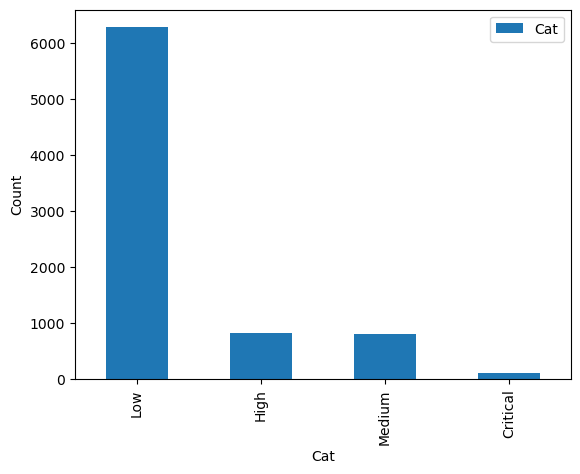

In [75]:
df['Priority'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.xlabel('Cat')
plt.legend(['Cat','Count'])
plt.show()

In [12]:
condition = df['Priority'] == 'Low'
num_rows_to_drop = 5500
rows_to_drop = df[condition].head(num_rows_to_drop).index

df_dropped = df.drop(rows_to_drop)

# Check the resulting DataFrame
print(df_dropped)

                                                Subject  Priority
2                                    data received sftp      High
3                              sftp client installation    Medium
4                   require dataprep sftp bluedart site    Medium
7                                      ftp server issue      High
29       live site code file access winscp giving error    Medium
...                                                 ...       ...
8035               system hanging slow system gradation       Low
8036  wfh laptop slow processing hanging multitaskin...       Low
8037                    unit vault pc slow getting hang       Low
8038                           system hanging able work  Critical
8039           laptop hang frequently interrupt working      High

[2540 rows x 2 columns]


In [14]:
df_dropped['Priority'].value_counts()

High        827
Medium      812
Low         788
Critical    113
Name: Priority, dtype: int64

Text(0.5, 1.0, 'Value Counts of Categories')

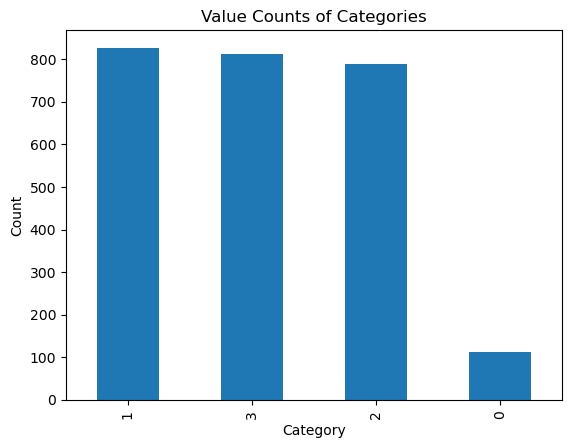

In [63]:
df_dropped['Priority'].value_counts().plot(kind='bar')

# Set labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Value Counts of Categories')


In [15]:
y=le.fit_transform(df_dropped['Priority'])
y

array([1, 3, 3, ..., 2, 0, 1])

In [19]:
catcols=[i for i in df.columns if df.dtypes[i]=='O']
catcols

['Subject', 'Priority']

In [16]:
df_dropped['Priority']=le.fit_transform(df_dropped['Priority'])

In [18]:
df_dropped.head(10)

,Subject,Priority
2,data received sftp,1
3,sftp client installation,3
4,require dataprep sftp bluedart site,3
7,ftp server issue,1
29,live site code file access winscp giving error,3
36,hello – currently experiencing issue attemptin...,1
38,client ftp connecting,1
39,bank data received sftp,1
45,cyberduck ftp connecting,1
49,mad ftp conneted,1


In [19]:
df_dropped['Priority'].unique()

array([1, 3, 0, 2])

In [20]:
df_dropped['Priority'].value_counts()

1    827
3    812
2    788
0    113
Name: Priority, dtype: int64

In [21]:
df_dropped.head()

,Subject,Priority
2,data received sftp,1
3,sftp client installation,3
4,require dataprep sftp bluedart site,3
7,ftp server issue,1
29,live site code file access winscp giving error,3


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_dropped['Subject'], df_dropped['Priority'], test_size=0.2, random_state=42)

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [25]:
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy*100)

Accuracy: 73.22834645669292


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy*100

69.88188976377953

In [81]:
s=input()
s=preprocess(s)
print(s)
s=vectorizer.transform([s])
# Make predictions
predictions = model.predict(s)
if predictions==[1]:
    print('High')
elif predictions==[2]:
    print('Low')
elif predictions==[0]:
    print('Critical')
else:
    print('Medium')
print(predictions)

MY WFH LAPTOP SLOW PROCESSING AND HANGING WHILE MULTI-TASKING, WITH BASIC APPLICATION
wfh laptop slow processing hanging multitasking basic application
Low
[2]


In [105]:
s=input()
s=preprocess(s)
print(s)
s=vectorizer.transform([s])
# Make predictions
predictions = rf_classifier.predict(s)
if predictions==[1]:
    print('High')
elif predictions==[2]:
    print('Low')
elif predictions==[0]:
    print('Critical')
else:
    print('Medium')
print(predictions)

Develop front-end code for website
develop frontend code website
High
[1]


In [99]:
df1=pd.read_excel('df_withoutdup_final_origi.xlsx')
df1.head()

,Unnamed: 0,Sl.No,RefNumber,Name,Subject,Priority,AssaignedName,EntryDate,eng_exit_date,restotal,...,Total,AssignDate,COMPLAINT CATEGORY,COMPLAINT REQUEST CATEGORY,COMPLAINT REQUEST TYPE,COMPLAINT DETAILS,CUSTOMER IMPACT,Message,Solution,Ratings
0,0,37,25152,Shashanka P,Not able to receive the files through Pinmaile...,Low,Jackson Dale Bangera,2020-07-01 15:18:40.223,2020-07-02 17:43:32.403,1 Days 2 hrs 25 mins,...,3 Days 2 hrs 26 mins,2020-07-01 15:34:30.497,IT,Incident,Network Issues,Share folder issues,no,Not able to receive the files through Pinmaile...,Please follow below steps.\n1. Download SSHLic...,NaN
1,1,58,25175,Umesha,FTP setup in mac system,Low,Poornesh Kumar,2020-07-02 14:49:29.920,2020-07-02 15:16:43.657,0 Days 1 hrs 27 mins,...,2 Days 1 hrs 27 mins,2020-07-02 14:51:33.307,IT,Incident,Others,Others,no,FTP setup in mac system.,"From the Apple menu, select System Preferences...",NaN
2,2,81,25199,Shashanka P,Data not received through SFTP,High,Jeevandas,2020-07-03 10:40:24.793,2020-07-03 12:03:10.467,0 Days 2 hrs 23 mins,...,2 Days 2 hrs 23 mins,2020-07-03 10:49:35.453,IT,Incident,Network Issues,Network Connection Issue,no,"Dear Sir, Data not received through SFTP at...",Please follow below steps.\n1. Download SSHLic...,NaN
3,3,224,25374,Reshma Bhat,Sftp Client installation,Medium,Sowmya P,2020-07-10 11:36:51.890,2020-07-10 14:45:04.467,0 Days 3 hrs 9 mins,...,1 Days 4 hrs 42 mins,2020-07-10 11:38:38.903,IT,Service,Site access,NaN,no,Need to install SFTP client to access MCT Prep...,Follow the link given https://www.webservertal...,4.0
4,4,593,25904,Reshma Bhat,Require Dataprep SFTP and Bluedart site,Medium,Sudarshan Mallya,2020-07-29 14:08:58.907,2020-07-30 12:24:53.467,1 Days 22 hrs 16 mins,...,1 Days 22 hrs 17 mins,2020-07-29 14:09:12.693,IT,Service,Site access,NaN,no,Blue dart Site is not accessing. Require Data...,You can create a SFTP connection through the T...,5.0


In [103]:
df1['COMPLAINT REQUEST TYPE'].value_counts()

Others                         3770
Software Issues                1062
System/Laptop Issue            1026
Network Issues                  663
Outlook/Mail issue              607
Printer Issue                   322
Share folder access              79
Site access                      78
VPN Installation                 65
SAP Installation                 30
Zoom Installtion                 19
Updating Saral TDS software      18
Need Anydesk                     14
CD request                       11
Colour Print request              9
Tally Software Installation       8
Skype Installation                6
Video download                    1
Name: COMPLAINT REQUEST TYPE, dtype: int64